In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv


# **<h2 style="color: lightblue;">Importing Libraries</h2>**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set the display width to avoid line breaks

import warnings
warnings.filterwarnings('ignore')

# **<h2 style="color: lightblue;">Data Definition</h2>**

![Kullanıcı Davranış Analizi](https://researchworld.com/uploads/attachments/clrhspfah095kidtdhdj2ocig-revealing-the-latest-trends-in-mobile-device-usage-and-consumer-behavior.max.png)

* This dataset aims to analyze mobile device usage and user behaviors. It contains data from a total of 700 users, encompassing various features such as device model, operating system, app usage times, screen-on durations, battery consumption, data usage, and demographic information for each user.
* The analysis of this dataset will help in understanding mobile device user behaviors, examining app usage patterns, and identifying factors that may potentially impact device performance. This information can provide valuable insights for mobile app developers, marketing specialists, and device manufacturers.



# **<h2 style="color: lightblue;">EDA - Exploratory Data Analysis</h2>**

In [3]:
df = pd.read_csv("/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")

In [4]:
def check_df(data, head=5):
    print(f'Dimensions of this dataset : {data.shape}')
    print("**********************************************************")
    
    # Display first few rows
    print(f"First {head} row of the dataset:\n")
    print(data.head(head).to_string(index=False))  # Display the data rows formatted
    print("\n**********************************************************")
    
    print(f"Numerical information about this dataset:\n{data.describe()}")
    print("\n**********************************************************")
    
    print(f"General information about the dataset : {data.info()}")
    print("\n**********************************************************")
    
    print(f"How many total null values ​​are there in this data set?\n{data.isnull().sum()}")
    print("\n**********************************************************")
    
    print(f"Are there any repeated observations in this data set?\n{data.duplicated().sum()}")
    print("\n**********************************************************")
    
    print(f"How many total unique values are there in this data set?\n{data.nunique()}")

In [5]:
check_df(df)

Dimensions of this dataset : (700, 11)
**********************************************************
First 5 row of the dataset:

 User ID   Device Model Operating System  App Usage Time (min/day)  Screen On Time (hours/day)  Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  Age Gender  User Behavior Class
       1 Google Pixel 5          Android                       393                         6.4                     1872                        67                 1122   40   Male                    4
       2      OnePlus 9          Android                       268                         4.7                     1331                        42                  944   47 Female                    3
       3   Xiaomi Mi 11          Android                       154                         4.0                      761                        32                  322   42   Male                    2
       4 Google Pixel 5          Android                       239       

# Dataset Summary

The dataset consists of 700 observations and 11 variables. 

## Key Insights:
- **Dimensions**: (700, 11)
- **First 5 Rows**: Includes user ID, device model, operating system, app usage time, screen on time, battery drain, number of apps installed, data usage, age, gender, and user behavior class.
- **Numerical Summary**: Provides mean, standard deviation, min, max, and percentiles for numerical features.
- **Null Values**: No null values are present in any columns.
- **Unique Values**: 
  - 700 unique User IDs
  - 5 unique Device Models
  - 2 unique Operating Systems
  - Other features show varying levels of uniqueness.

Overall, the dataset appears clean and well-structured for further analysis.


# **<h2 style="color: lightblue;">Data Visualization</h2>**

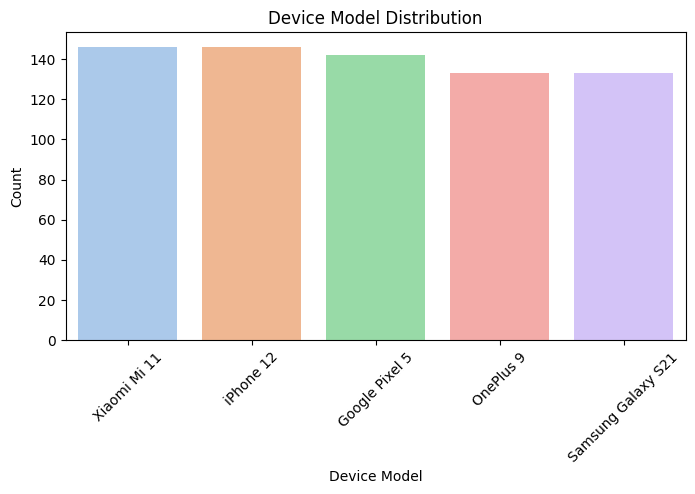

In [6]:
plt.figure(figsize=(8, 4))

sns.countplot(data=df, 
              x='Device Model', 
              order=df['Device Model'].value_counts().index,
              palette="pastel")

plt.title('Device Model Distribution')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Device Model')
plt.show()

- The graph highlights that the most commonly used device model is **Xiaomi**. This indicates that Xiaomi has a high popularity among users.
- **Samsung** appears as the least used device model in the graph. This situation may suggest a decreased interest in the Samsung brand compared to other brands.
- While the graph clearly illustrates the distribution of device models, it showcases Xiaomi's leadership and the strong position of the **iPhone 12**. Other brands appear to have less popularity.


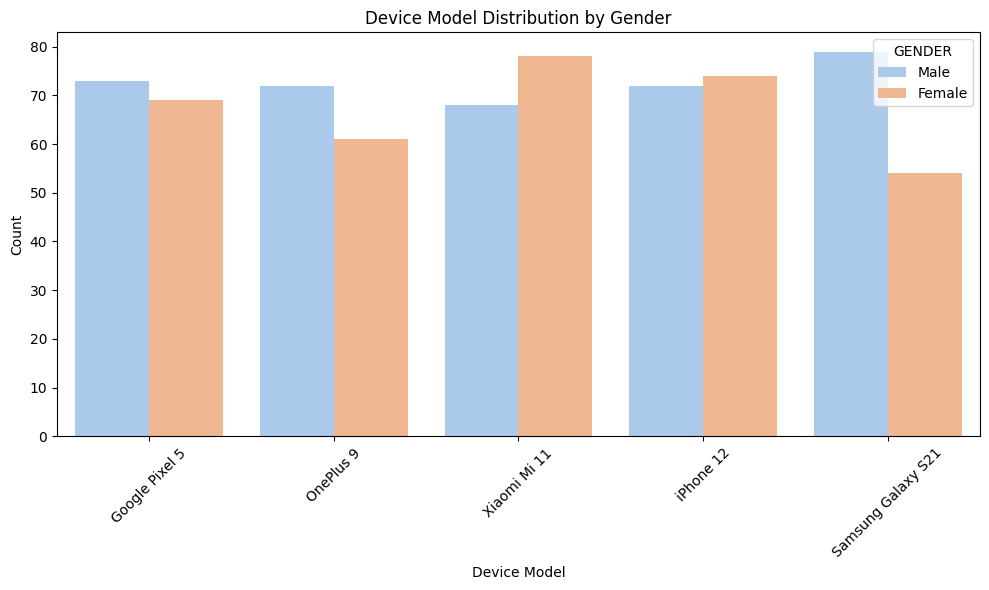

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, 
              x='Device Model',
              hue='Gender',
              palette='pastel')

plt.title('Device Model Distribution by Gender')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.legend(title='GENDER')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The graph clearly illustrates how device models are distributed by gender and which devices are preferred by different genders.
- Among women, the most commonly used devices are the **Xiaomi Mi11** and **iPhone 12**.
- Other phone brands tend to be used more by men.


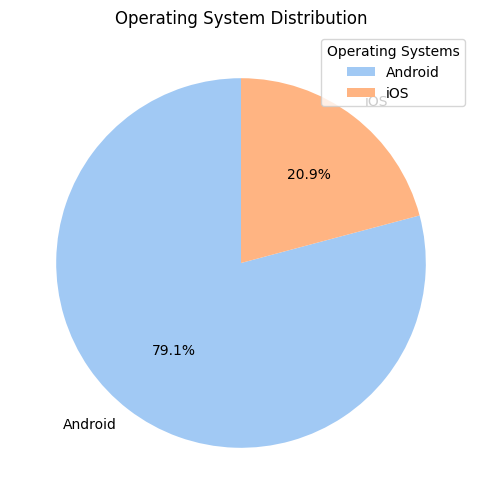

In [8]:
plt.figure(figsize=(6, 6))
df['Operating System'].value_counts().plot.pie(autopct='%1.1f%%', 
                                                  startangle=90, 
                                                  colors=sns.color_palette('pastel'),
                                                  legend=True) 

plt.title('Operating System Distribution')
plt.ylabel('')
plt.legend(title='Operating Systems') 
plt.show()



- **Android** holds the largest share at **79.1%**. This indicates that the majority of users are utilizing the Android operating system.
- **iOS** follows in second place with a share of **20.9%**. This percentage shows that while iOS users are fewer in number, they still represent a significant audience.


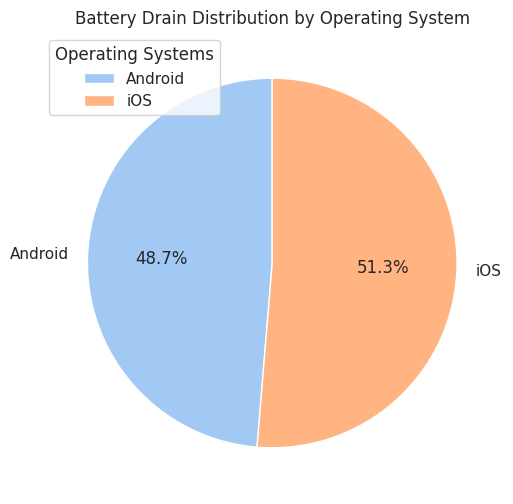

In [9]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Calculate the average battery drain for each operating system
battery_usage_by_os = df.groupby('Operating System')['Battery Drain (mAh/day)'].mean()

# Plot the pie chart for battery consumption by operating system
plt.figure(figsize=(6, 6))
battery_usage_by_os.plot.pie(autopct='%1.1f%%', 
                               startangle=90, 
                               colors=sns.color_palette('pastel'),
                               legend=True)

plt.title('Battery Drain Distribution by Operating System')
plt.ylabel('')
plt.legend(title='Operating Systems') 
plt.show()


- This graph helps understand which operating system consumes more battery.
- **iOS**: Holds a share of **51.3%**, indicating that iOS users consume, on average, more battery.
- **Android**: Holds a share of **48.7%**, suggesting that Android users have slightly lower average battery consumption.


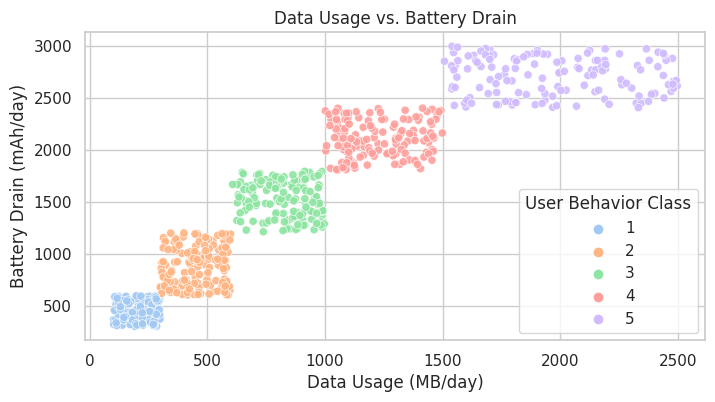

In [10]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, 
                 x='Data Usage (MB/day)', 
                 y='Battery Drain (mAh/day)', 
                 hue='User Behavior Class',  
                 palette='pastel',           
                 alpha=0.9)                 

plt.title('Data Usage vs. Battery Drain')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.legend(title='User Behavior Class')
plt.grid(True)
plt.show()

- The highest battery drain (mAh/day) value belongs to the 5th user behavior class. This indicates that users in the 5th class likely engage in more intensive data usage, resulting in higher battery consumption. This group may represent an active user segment that utilizes applications or content more frequently.

- Conversely, the 1st class exhibits the lowest battery drain value, suggesting that this user group consumes less data or interacts with applications less intensively. 

- Overall, it is expected that as data usage increases, battery drain values will also rise. This graph highlights this relationship while emphasizing the significant differences between user classes.


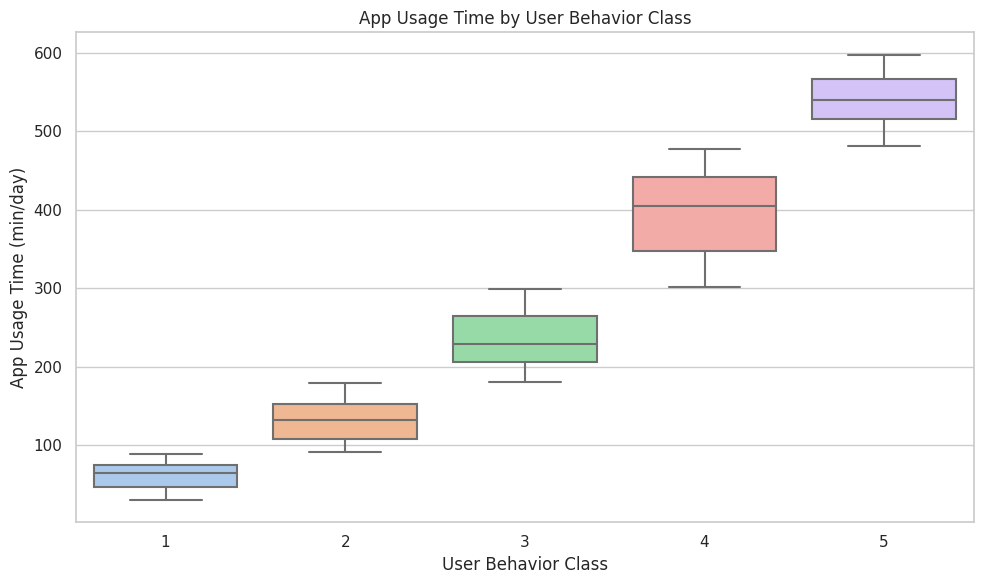

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, 
            x='User Behavior Class', 
            y='App Usage Time (min/day)', 
            palette='pastel')

plt.title('App Usage Time by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('App Usage Time (min/day)')
plt.tight_layout()
plt.show()


- According to the data in the graph, the **5th user behavior class** has the highest app usage time, while the **1st class** has the lowest.This indicates that users in the 5th class are using applications more actively and intensively.
- In contrast, the 1st class shows less app usage, suggesting that this user group is engaging in a more passive interaction.
- These differences highlight the variability in how users interact with their devices and their differing needs.
- The graph emphasizes the significant differences in app usage times among user behavior classes.Increased app usage may enhance users' interest in content and applications, whereas lower usage times indicate a less active experience.


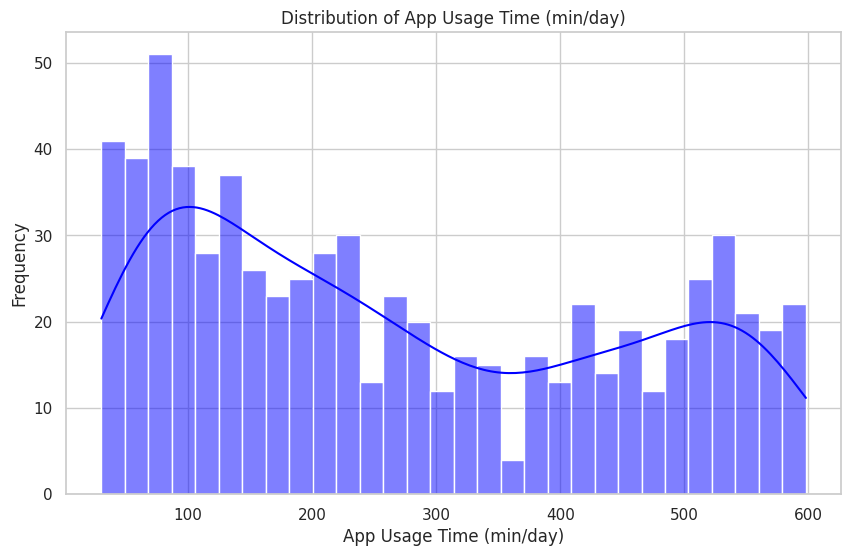

In [12]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram for 'App Usage Time (min/day)'
plt.figure(figsize=(10, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Usage Time (min/day)')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

- In the graph, there is a high concentration of app usage between 50 and 150 minutes per day, indicating that most users fall within this range. The form of the KDE curve shows that average usage times are concentrated at lower values, while longer usage times are more rare.

- The majority of users spend between 50 and 200 minutes per day on apps, with very long usage times (500-600 minutes) being less frequent. This suggests that users generally have moderate app usage habits, and extremely long usage times are outliers.


In [13]:
# Select only numeric columns (int and float)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()
colName = 'User Behavior Class'  

column_correlation = corr_matrix[colName].sort_values()
print(column_correlation)

User ID                      -0.016242
Age                          -0.000563
Data Usage (MB/day)           0.946734
Screen On Time (hours/day)    0.964581
App Usage Time (min/day)      0.970498
Battery Drain (mAh/day)       0.978587
Number of Apps Installed      0.981255
User Behavior Class           1.000000
Name: User Behavior Class, dtype: float64


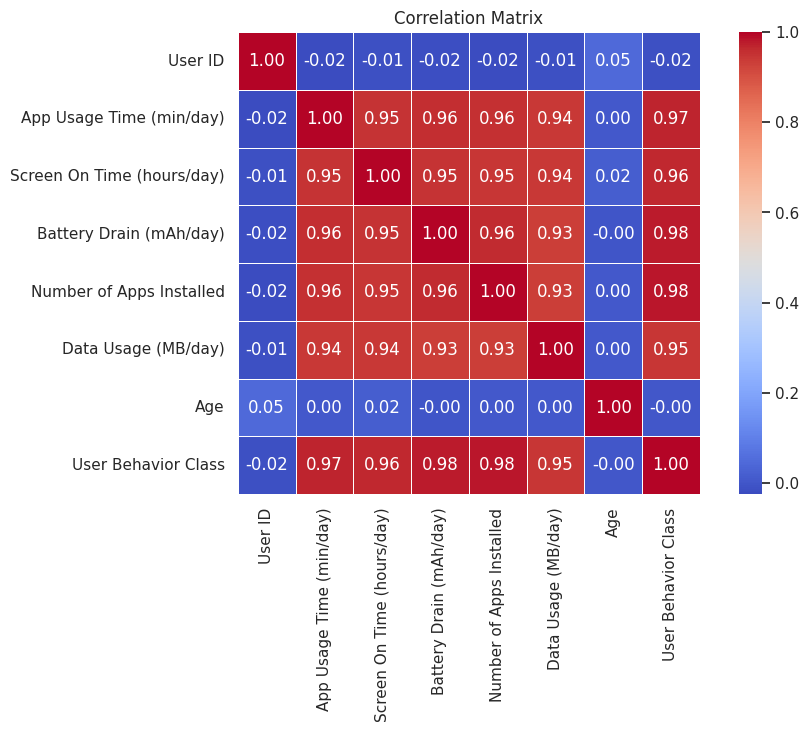

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            square=True, 
            cbar=True, 
            linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

- This indicates that the **User Behavior Class** has a strong relationship with these variables.Specifically, the increase in the number of apps installed and app usage time suggests that users in a higher behavior class are more active.
- The correlation value between **Age** and **User Behavior Class** (-0.000563) is nearly zero. This shows that age has no significant effect on the user behavior class, meaning user behavior does not significantly vary with age.
- The high positive correlation between app usage time and battery consumption indicates a direct relationship between more app usage and higher battery drain.This situation suggests that when users are active, they consume more data and their batteries drain faster.


# **<h2 style="color: lightblue;">Data Preprocessing</h2>**

In [15]:
df = df.drop(columns=['User ID',"Device Model"])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
# One-hot encoding uygulamak için
X= pd.get_dummies(X, columns=['Operating System'], drop_first=True)

# Label encoding uygulamak için (Gender sütunu)
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Tüm X sütunlarını int türüne dönüştürme
X = X.astype(int)

In [17]:
X.values

array([[ 393,    6, 1872, ...,   40,    1,    0],
       [ 268,    4, 1331, ...,   47,    0,    0],
       [ 154,    4,  761, ...,   42,    1,    0],
       ...,
       [  99,    3,  942, ...,   50,    0,    0],
       [  62,    1,  431, ...,   44,    1,    0],
       [ 212,    5, 1306, ...,   23,    0,    0]])

In [18]:
y.values

array([4, 3, 2, 3, 3, 2, 4, 5, 4, 4, 1, 3, 4, 3, 3, 5, 2, 3, 1, 5, 2, 5,
       4, 3, 3, 2, 4, 5, 4, 4, 3, 3, 3, 1, 5, 1, 2, 5, 4, 4, 3, 5, 2, 2,
       2, 5, 5, 2, 5, 5, 4, 3, 2, 2, 5, 1, 1, 5, 4, 4, 5, 4, 1, 5, 4, 3,
       3, 2, 5, 1, 4, 5, 4, 1, 1, 3, 1, 2, 1, 3, 5, 2, 4, 1, 3, 4, 2, 1,
       2, 4, 2, 3, 1, 2, 4, 4, 5, 5, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1, 3, 3,
       2, 5, 3, 2, 4, 2, 1, 3, 1, 2, 4, 5, 5, 5, 3, 5, 4, 3, 2, 2, 5, 4,
       2, 1, 1, 5, 1, 3, 5, 5, 3, 4, 2, 1, 5, 3, 4, 1, 3, 2, 5, 1, 2, 4,
       1, 2, 1, 4, 4, 2, 1, 1, 4, 1, 3, 5, 5, 1, 3, 5, 2, 1, 2, 4, 1, 3,
       3, 3, 3, 5, 2, 4, 5, 1, 5, 5, 4, 1, 2, 1, 2, 1, 4, 3, 4, 3, 3, 2,
       1, 2, 5, 2, 1, 1, 2, 4, 1, 2, 5, 3, 4, 5, 2, 1, 2, 5, 4, 5, 5, 2,
       4, 2, 4, 5, 2, 5, 4, 3, 2, 4, 2, 5, 5, 2, 2, 1, 5, 4, 1, 5, 1, 5,
       2, 4, 1, 3, 1, 4, 2, 1, 1, 4, 5, 2, 1, 4, 4, 3, 3, 5, 1, 4, 5, 1,
       4, 5, 3, 5, 3, 4, 4, 3, 2, 2, 2, 5, 3, 3, 1, 4, 1, 1, 4, 1, 4, 5,
       4, 3, 2, 1, 4, 1, 1, 3, 5, 1, 4, 2, 3, 2, 4,

- These preprocessing steps enable the model to perform better and allow for more effective analysis of the data. Having the dataset in an appropriate format positively impacts the model's learning process and outcomes.

# **<h2 style="color: lightblue;">Models Training and Testing</h2>**

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [20]:
# Standardization of X_train & X_test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators = 10,random_state = 42),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 5),
    "Naive Bayes" : GaussianNB(),
    "Support Vector Machine" : SVC(random_state = 42)
}

In [22]:
results={}

In [23]:
for model_name , model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    
    # calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # keep results
    results[model_name] = {
        'accuracy': accuracy,
        'confusion_matrix': conf_matrix,
        'report': report
    }

# print the results
for model_name, metrics in results.items():
    print(f"--- {model_name} ---")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Confusion Matrix:")
    print(metrics['confusion_matrix'])
    print("Classification Report:")
    print(classification_report(y_test, models[model_name].predict(X_test)))

--- Random Forest ---
Accuracy: 1.00
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

--- K-Nearest Neighbors ---
Accuracy: 0.99
Confusion Matrix:
[[27  0  0  0  0]
 [ 0 29  0  0  0]
 [ 0  0 34  0  0]
 [ 0  0  1 26  0]
 [ 0  0  0  0 23]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
    

# **<h2 style="color: lightblue;">General Evaulation</h2>**

- The reason for choosing classification algorithms for this dataset is that the target variable, "User Behavior Class," is categorical. Since there are several factors that influence user behavior (such as age, gender, and app usage times), it is important to understand the impact of each of these features on the target variable. The selected algorithms (Random Forest, KNN, Naive Bayes, SVM) generally provide high accuracy and performance, allowing for the identification of the most suitable model for the dataset. Additionally, these algorithms possess generalization capabilities that help minimize the risk of overfitting, while their ability to handle complex data structures enables accurate classification of user behaviors.
- All models achieved high accuracy rates on the test set. Random Forest, Naive Bayes, and SVM stand out with 100% accuracy, while KNN demonstrates a strong performance with 99%. These results indicate that the models have been trained appropriately on the dataset and generally possess good generalization capabilities.
- These results indicate that the models have adapted very well to the training data. However, we need to consider the possibility of overfitting. By increasing the balance and diversity of the dataset or testing with different datasets, we can better evaluate the generalization capabilities of these models.